# **Project Overview**

This project explores historical aviation accident data to identify safety patterns related to aircraft operations. The analysis focuses on accident outcomes such as fatalities and damage severity, using data from the National Transportation Safety Board covering incidents from 2018 to 2022.

The project applies data cleaning, aggregation, and visualization techniques to uncover trends and support high-level insights. These insights are later translated into recommendations relevant to aviation-related business decisions.

## Business Understanding

The company is considering entering the aviation industry and needs to understand the risks associated with different aircraft. This analysis uses historical accident data to identify lower-risk aircraft options.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset that is the flight.csv

In [2]:
df = pd.read_csv ('flight.csv')

In [3]:
# Check wheather the data is loaded succesfully by printing the first 5 rows.
df.head(5)

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o


## Data Understanding

In [4]:
# This checks on the number of columns and Rows
df.shape

(2500, 8)

In [5]:
# This helps in checking/understanding how the data is
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2500 non-null   int64 
 1   acc.date    2500 non-null   object
 2   type        2500 non-null   object
 3   reg         2408 non-null   object
 4   operator    2486 non-null   object
 5   fat         2488 non-null   object
 6   location    2500 non-null   object
 7   dmg         2500 non-null   object
dtypes: int64(1), object(7)
memory usage: 156.4+ KB


In [6]:
# Check the number of missing values in each column
df.isna().sum()

Unnamed: 0     0
acc.date       0
type           0
reg           92
operator      14
fat           12
location       0
dmg            0
dtype: int64

The dataset contains 2,500 records and 8 columns. Several columns, including registration, operator, and fatalities, contain missing values, indicating the need for data cleaning. Most variables are stored as object types.Registration column has 92 missing values, operator column has 14 missing values, fatalities column has 12 missing values.

## Data Preparation

In [7]:
df

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...,...
2495,1245,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,1246,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,1247,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,1248,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub


In [8]:
# first drop the unnamed column
df = df.drop(columns=['Unnamed: 0'])
df

,acc.date,type,reg,operator,fat,location,dmg
0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...
2495,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub


In [9]:
# Dropped the index column and now columns have reduced from 8 to 7
df.shape

(2500, 7)

Since the analysis will focus on fatalities, only rows with missing fatality values will be removed. Dropping all missing values would affect the quality of the dataset.

In [10]:
# Drop missing values in fatalities column
df = df.dropna(subset=["fat"])
df

,acc.date,type,reg,operator,fat,location,dmg
0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...
2495,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub


In [11]:
# Number of rows after dropping
df.shape

(2488, 7)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2488 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   acc.date  2488 non-null   object
 1   type      2488 non-null   object
 2   reg       2400 non-null   object
 3   operator  2474 non-null   object
 4   fat       2488 non-null   object
 5   location  2488 non-null   object
 6   dmg       2488 non-null   object
dtypes: object(7)
memory usage: 155.5+ KB


After handling missing fatality values, the dataset was reduced to 2,488 rows.

In [40]:
# From the above data info, registration and operator columns has some missing values
# Fill the missing values in registration
df["reg"] = df["reg"].fillna("Unknown")

In [41]:
# Fill the missing values in operator
df["operator"] = df["operator"].fillna("Unknown")

In [42]:
# Confirm if the missing values were filled
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1222 entries, 0 to 1223
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acc.date  1222 non-null   datetime64[ns]
 1   type      1222 non-null   object        
 2   reg       1222 non-null   object        
 3   operator  1222 non-null   object        
 4   fat       1222 non-null   float64       
 5   location  1222 non-null   object        
 6   dmg       1222 non-null   object        
 7   year      1222 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), object(5)
memory usage: 81.1+ KB


Missing values in categorical columns were filled with ‘Unknown’ to preserve the dataset.

The data is stored as objects, so it needs to be converted to numeric values in order to analyze accidents over time. Target columns are the accident date and the fatalities.

In [43]:
# Convert accident date to datetime
# errors = 'coerce' (makes sure that incomplete dates eg(xx-june-2022) dont break the analysis)
df["acc.date"] = pd.to_datetime(df["acc.date"], errors="coerce")

In [44]:
# Convert fatalities to numeric
df["fat"] = pd.to_numeric(df["fat"], errors="coerce")

In [18]:
# Check structure of the dataset after conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2488 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acc.date  2482 non-null   datetime64[ns]
 1   type      2488 non-null   object        
 2   reg       2488 non-null   object        
 3   operator  2488 non-null   object        
 4   fat       2450 non-null   float64       
 5   location  2488 non-null   object        
 6   dmg       2488 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 155.5+ KB


38 rows in fatalities were not valid numbers and they were replaced to Nan

In [19]:
# Remove the rows which could not be converted to numeric
df = df.dropna(subset=["fat"])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2450 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acc.date  2444 non-null   datetime64[ns]
 1   type      2450 non-null   object        
 2   reg       2450 non-null   object        
 3   operator  2450 non-null   object        
 4   fat       2450 non-null   float64       
 5   location  2450 non-null   object        
 6   dmg       2450 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 153.1+ KB


In [21]:
# Now lets update/reset the index to keep it clean 
df = df.reset_index(drop=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acc.date  2444 non-null   datetime64[ns]
 1   type      2450 non-null   object        
 2   reg       2450 non-null   object        
 3   operator  2450 non-null   object        
 4   fat       2450 non-null   float64       
 5   location  2450 non-null   object        
 6   dmg       2450 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 134.1+ KB


In [23]:
df

,acc.date,type,reg,operator,fat,location,dmg
0,2022-01-03,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0.0,near Venetia Mine Airport,sub
1,2022-01-04,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0.0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2022-01-05,Boeing 737-4H6,EP-CAP,Caspian Airlines,0.0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,2022-01-08,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0.0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,2022-01-12,Beechcraft 200 Super King Air,Unknown,private,0.0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...
2445,2018-12-20,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4.0,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2446,2018-12-22,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0.0,Kamarata Airport (KTV),sub
2447,2018-12-24,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0.0,Beni Airport (BNC),w/o
2448,2018-12-31,Boeing 757-2B7 (WL),N938UW,American Airlines,0.0,"Charlotte-Douglas International Airport, NC (C...",sub


In [24]:
# Check duplicates
df.duplicated().sum()

1225

In [25]:
# Remove/drop the duplicates
df = df.drop_duplicates()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acc.date  1222 non-null   datetime64[ns]
 1   type      1225 non-null   object        
 2   reg       1225 non-null   object        
 3   operator  1225 non-null   object        
 4   fat       1225 non-null   float64       
 5   location  1225 non-null   object        
 6   dmg       1225 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 76.6+ KB


In [27]:
df = df.reset_index(drop=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   acc.date  1222 non-null   datetime64[ns]
 1   type      1225 non-null   object        
 2   reg       1225 non-null   object        
 3   operator  1225 non-null   object        
 4   fat       1225 non-null   float64       
 5   location  1225 non-null   object        
 6   dmg       1225 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 67.1+ KB


Successfully dropped 1225 duplicates.

Since our main objective is to identify the lower risk aircraft, create a year column which will help us to compare accident risks overtime (1962-2023), show whether safety has improved over the years and be able support our recommendations.

In [29]:
# create a year column
df["year"] = df["acc.date"].dt.year

In [30]:
# Remove rows where year could not be extracted
df = df.dropna(subset=["year"])

In [31]:
# Convert year to integer for cleaner plotting
df["year"] = df["year"].astype(int)

In [32]:
# Check whether it has been created
df.head()

,acc.date,type,reg,operator,fat,location,dmg,year
0,2022-01-03,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0.0,near Venetia Mine Airport,sub,2022
1,2022-01-04,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0.0,Roatán-Juan Manuel Gálvez International Airpor...,sub,2022
2,2022-01-05,Boeing 737-4H6,EP-CAP,Caspian Airlines,0.0,Isfahan-Shahid Beheshti Airport (IFN),sub,2022
3,2022-01-08,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0.0,Hangzhou Xiaoshan International Airport (HGH),w/o,2022
4,2022-01-12,Beechcraft 200 Super King Air,Unknown,private,0.0,"Machakilha, Toledo District, Grahem Creek area",w/o,2022


In [33]:
# Create a clean copy of the DataFrame to avoid SettingWithCopyWarning
df = df.copy()

3 records contain incomplete accident dates, resulting in missing year values. These records will be retained since they still contain valid fatality and aircraft information relevant to risk analysis.

## Data Analysis and Visualizations

Aircraft Type vs Fatalities analysis because the company wants to know which aircraft are lowest risk

In [34]:
# Group data by aircraft type
# Calculate total fatalities for each aircraft type
type_fatalities = df.groupby("type")["fat"].sum()

In [35]:
# Sort aircraft types by total fatalities
# Sorting helps clearly identify higher-risk and lower-risk aircraft
type_fatalities = type_fatalities.sort_values(ascending=False)

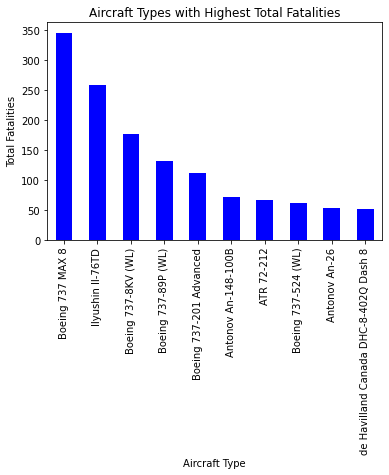

In [36]:
# Plot the top 10 aircraft types with the highest total fatalities
type_fatalities.head(10).plot(kind="bar", color="blue")

plt.title("Aircraft Types with Highest Total Fatalities")
plt.xlabel("Aircraft Type")
plt.ylabel("Total Fatalities")
plt.show()

Aircraft types with the highest total fatalities were visualized to highlight higher-risk options. This allows the company to avoid these aircraft and focus on lower-risk alternatives.

Fatalities over time analysis

In [37]:
# Group the data by year
# Calculate the total number of fatalities for each year
fatalities_by_year = df.groupby("year")["fat"].sum()

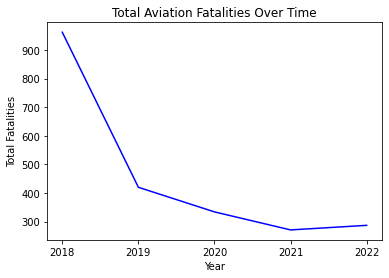

In [38]:
# Plot total fatalities over time
fatalities_by_year.plot(color="blue")

plt.title("Total Aviation Fatalities Over Time")
plt.xlabel("Year")
plt.ylabel("Total Fatalities")
plt.xticks(fatalities_by_year.index.astype(int))
plt.show()

The visualization shows how total aviation fatalities have changed over time, providing historical context for assessing aircraft risk.In 2018 there were more fatalities compared to 2022. From the graph above we can see that the number of fatalities has reduced overtime.

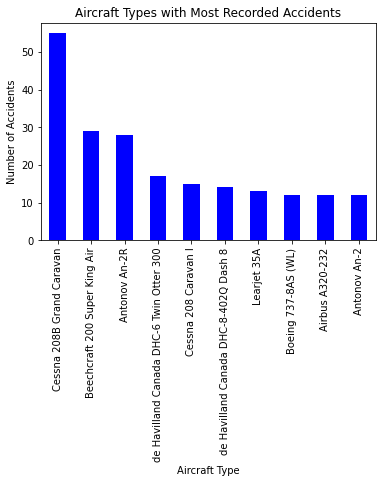

In [39]:
# Check the number of accidents per Aircraft Type
# Count number of accidents per aircraft type
accidents_by_type = df.groupby("type")["fat"].count().sort_values(ascending=False)

# Plot top 10 most frequent aircraft types in accidents
accidents_by_type.head(10).plot(kind="bar",color="blue")

plt.title("Aircraft Types with Most Recorded Accidents")
plt.xlabel("Aircraft Type")
plt.ylabel("Number of Accidents")
plt.show()

From the graph above, its clear that Cessna 208B Grand Caravan had more accidents than Airbus A320-232 hence having high risk.

## Recommendation

The company should prioritize aircraft types with historically low fatalities and accident counts, as these represent the lowest operational risk for entering the aviation business.

## Data Export for Visualization
The cleaned dataset will be exported for further visualization and dashboard creation in Tableau.

In [46]:
df.to_excel("cleaned_flight_data.xlsx", index=False)

## Tableau Link
https://public.tableau.com/views/Phase1_Projectflightdata/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link